<a href="https://colab.research.google.com/github/headshoter1/pytorch/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [41]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() #напишите, почему не работает без этого метода
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
    
    def forward(self, x):
      x = F.relu(self.fc1(x)) #relu - функция активации
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.fc4(x)
      return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
X = torch.randn((28,28))

In [43]:
X

tensor([[ 3.5108e-01, -1.3270e+00,  5.1762e-01, -6.7454e-01, -3.3467e-01,
         -3.7283e-01,  1.0774e+00, -6.9147e-01, -1.2094e+00,  1.1512e+00,
          2.4368e-01,  1.8897e+00, -1.2055e+00,  5.7508e-01, -6.9677e-01,
          9.4197e-01,  4.1342e-01, -1.3474e+00, -1.2496e+00,  9.5084e-01,
          1.1352e+00, -1.8360e-01, -1.2002e+00,  8.2581e-01,  3.9380e-01,
         -7.7814e-01,  8.5574e-01, -1.6758e+00],
        [-1.4274e+00,  7.2181e-01,  7.4560e-01,  9.5656e-01,  4.7465e-01,
         -1.0030e-01,  3.2490e-02, -7.5599e-01, -1.0038e+00, -1.4242e+00,
          3.7971e-01,  2.8491e-01, -2.4923e+00,  6.6768e-01,  1.1854e+00,
         -5.4486e-01,  2.7734e-01, -8.6102e-01,  3.3217e-01,  2.0642e+00,
          4.4065e-01,  4.3900e-01,  9.7031e-01, -4.9240e-01,  2.9753e-02,
          4.8552e-02, -8.9188e-01,  1.1817e+00],
        [ 2.1138e+00,  1.9745e+00,  4.3111e-01,  8.8951e-01, -6.1719e-01,
         -1.9671e+00,  8.1846e-01, -1.3232e+00, -5.1947e-01, -1.1801e+00,
          7.49

In [0]:
X = X.view(-1,28*28)

In [45]:
X

tensor([[ 3.5108e-01, -1.3270e+00,  5.1762e-01, -6.7454e-01, -3.3467e-01,
         -3.7283e-01,  1.0774e+00, -6.9147e-01, -1.2094e+00,  1.1512e+00,
          2.4368e-01,  1.8897e+00, -1.2055e+00,  5.7508e-01, -6.9677e-01,
          9.4197e-01,  4.1342e-01, -1.3474e+00, -1.2496e+00,  9.5084e-01,
          1.1352e+00, -1.8360e-01, -1.2002e+00,  8.2581e-01,  3.9380e-01,
         -7.7814e-01,  8.5574e-01, -1.6758e+00, -1.4274e+00,  7.2181e-01,
          7.4560e-01,  9.5656e-01,  4.7465e-01, -1.0030e-01,  3.2490e-02,
         -7.5599e-01, -1.0038e+00, -1.4242e+00,  3.7971e-01,  2.8491e-01,
         -2.4923e+00,  6.6768e-01,  1.1854e+00, -5.4486e-01,  2.7734e-01,
         -8.6102e-01,  3.3217e-01,  2.0642e+00,  4.4065e-01,  4.3900e-01,
          9.7031e-01, -4.9240e-01,  2.9753e-02,  4.8552e-02, -8.9188e-01,
          1.1817e+00,  2.1138e+00,  1.9745e+00,  4.3111e-01,  8.8951e-01,
         -6.1719e-01, -1.9671e+00,  8.1846e-01, -1.3232e+00, -5.1947e-01,
         -1.1801e+00,  7.4988e-01, -1.

In [0]:
output = net(X)

In [47]:
output

tensor([[-2.5011, -2.2288, -2.3087, -2.2848, -2.3531, -2.2717, -2.3709, -2.2350,
         -2.2554, -2.2468]], grad_fn=<LogSoftmaxBackward>)

In [0]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [51]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.3331, grad_fn=<NllLossBackward>)
tensor(0.3630, grad_fn=<NllLossBackward>)
tensor(0.0026, grad_fn=<NllLossBackward>)


In [52]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.971


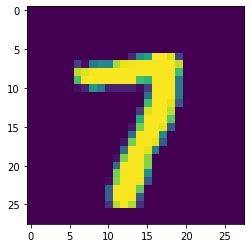

In [53]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [54]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7)


In [55]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-3.5781e+01, -1.3904e+01, -1.4164e+01, -1.4468e+01, -2.1771e+01,
        -2.0746e+01, -4.3505e+01, -1.3471e-05, -2.0839e+01, -1.1386e+01],
       grad_fn=<SelectBackward>)


In [56]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(7)
